## Justification or answer summary needed for every question

In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("Placement_Data_Full_Class.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [4]:
dataset.isnull().sum()

sl_no              2
gender             2
ssc_p              2
ssc_b              2
hsc_p              2
hsc_b              2
hsc_s              2
degree_p           2
degree_t           2
workex             2
etest_p            2
specialisation     2
mba_p              2
status             2
salary            69
dtype: int64

In [5]:
dataset['salary'].fillna(0,inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_20348\3738702580.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['salary'].fillna(0,inplace=True)


In [6]:
dataset.isnull().sum()

sl_no             2
gender            2
ssc_p             2
ssc_b             2
hsc_p             2
hsc_b             2
hsc_s             2
degree_p          2
degree_t          2
workex            2
etest_p           2
specialisation    2
mba_p             2
status            2
salary            0
dtype: int64

## 1.Replace the NaN values with correct value. And justify why you have chosen the same.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    float64
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          217 non-null    float64
dtypes: float64(7), object(8)
memory usage: 25.6+ KB


In [8]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtype=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [9]:
quan,qual=quanQual(dataset)

In [10]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [11]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [12]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dataset[quan])
df=imp.transform(dataset[quan])
df = pd.DataFrame(df,columns = quan)

In [13]:
df

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0


In [14]:
df.isnull().sum()

sl_no       0
ssc_p       0
hsc_p       0
degree_p    0
etest_p     0
mba_p       0
salary      0
dtype: int64

In [15]:
cate=dataset[qual]

In [16]:
cate

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...
212,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [17]:
cate.isnull().sum()

gender            2
ssc_b             2
hsc_b             2
hsc_s             2
degree_t          2
workex            2
specialisation    2
status            2
dtype: int64

In [18]:
import numpy as np
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(dataset[qual])
cate=imp.transform(dataset[qual])
cate = pd.DataFrame(cate,columns = qual)

In [19]:
cate.isnull().sum()

gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [20]:
two=[df,cate]

In [21]:
preprocessed=pd.concat(two,axis=1)

In [22]:
preprocessed

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [23]:
preprocessed.isnull().sum()

sl_no             0
ssc_p             0
hsc_p             0
degree_p          0
etest_p           0
mba_p             0
salary            0
gender            0
ssc_b             0
hsc_b             0
hsc_s             0
degree_t          0
workex            0
specialisation    0
status            0
dtype: int64

In [24]:
preprocessed.to_csv("Preplacementfulldata.csv",index=False)

In [25]:
preprocessed

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [ ]:
## Answer: Removed all the null values

## 2.How many of them are not placed?

In [26]:
import pandas as pd

In [27]:
dataset=pd.read_csv("Preplacementfulldata.csv")

In [28]:
dataset['status'].value_counts()

status
Placed        150
Not Placed     67
Name: count, dtype: int64

In [ ]:
## Answer: 67 persons are not placed in this dataset

## 3.Find the reason for non placement from the dataset?

In [29]:
import pandas as pd

In [30]:
dataset=pd.read_csv("Preplacementfulldata.csv")

In [31]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [32]:
dataset.columns

Index(['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
col = ['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary',
       'gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex',
       'specialisation', 'status']
for i in col:
    dataset[i] = le.fit_transform(dataset[i]).astype(int)

In [34]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,0,46,94,14,9,64,20,1,1,1,1,2,0,1,1
1,1,83,80,75,75,154,1,1,0,1,2,2,1,0,1
2,2,42,52,27,56,50,13,1,0,0,0,0,0,0,1
3,3,22,14,3,37,72,0,1,0,0,2,2,0,1,0
4,4,99,71,66,97,28,40,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,210,86,85,77,84,200,37,1,1,1,1,0,0,0,1
213,211,25,24,61,53,14,21,1,1,1,2,2,0,0,1
214,212,46,50,65,25,180,28,1,1,1,1,0,1,0,1
215,213,65,45,14,45,81,2,0,1,1,1,0,0,1,1


In [35]:
dataset.corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
sl_no,1.000000,-0.081945,-0.119294,-0.110948,0.069264,0.005722,0.012059,0.074119,0.027107,0.116543,0.009937,0.025597,0.059009,0.046461,-0.026804
ssc_p,-0.081945,1.000000,0.486735,0.532203,0.282870,0.390217,0.482302,-0.081897,0.124893,0.075246,0.244332,0.211502,0.179193,-0.178610,0.589217
hsc_p,-0.119294,0.486735,1.000000,0.423782,0.219906,0.330731,0.376685,-0.007944,-0.145058,-0.065071,-0.181418,-0.101833,0.126306,-0.243463,0.464857
degree_p,-0.110948,0.532203,0.423782,1.000000,0.232142,0.386409,0.330458,-0.165083,0.025488,0.052405,0.132981,0.074257,0.135985,-0.210460,0.476586
etest_p,0.069264,0.282870,0.219906,0.232142,1.000000,0.222568,0.229091,0.084284,-0.016738,0.030237,0.070306,0.012548,0.061896,-0.233544,0.114787
mba_p,0.005722,0.390217,0.330731,0.386409,0.222568,1.000000,0.152222,-0.316125,0.078958,0.080007,0.050487,0.116753,0.153995,-0.115531,0.063489
salary,0.012059,0.482302,0.376685,0.330458,0.229091,0.152222,1.000000,0.192854,0.079196,0.025524,0.071374,0.112825,0.256182,-0.243224,0.682054
gender,0.074119,-0.081897,-0.007944,-0.165083,0.084284,-0.316125,0.192854,1.000000,0.013049,0.071013,0.067155,0.056480,0.079821,-0.111535,0.094819
ssc_b,0.027107,0.124893,-0.145058,0.025488,-0.016738,0.078958,0.079196,0.013049,1.000000,0.594967,0.056058,0.105975,-0.034357,-0.043658,0.031379
hsc_b,0.116543,0.075246,-0.065071,0.052405,0.030237,0.080007,0.025524,0.071013,0.594967,1.000000,0.146777,0.052707,0.032834,-0.004306,0.021800


In [ ]:
## 1.The student got average percentage in degree_t and mba_p 
## This is the main reason for student 'Not placed'
## 2. majority of students are in MBA-HR Department


## 4.What kind of relation between salary and mba_p

In [36]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.081945,-0.119294,-0.110948,0.069264,0.005722,0.012059
ssc_p,-0.081945,1.000000,0.486735,0.532203,0.282870,0.390217,0.482302
hsc_p,-0.119294,0.486735,1.000000,0.423782,0.219906,0.330731,0.376685
degree_p,-0.110948,0.532203,0.423782,1.000000,0.232142,0.386409,0.330458
etest_p,0.069264,0.282870,0.219906,0.232142,1.000000,0.222568,0.229091
mba_p,0.005722,0.390217,0.330731,0.386409,0.222568,1.000000,0.152222
salary,0.012059,0.482302,0.376685,0.330458,0.229091,0.152222,1.000000


In [ ]:
## The relation between salary and mba_p is 0.152222. 
## This is the positive correlation
## This is very poor freedom of values

## 5.Which specialization is getting minimum salary?¶

In [37]:
import pandas as pd

In [38]:
dataset=pd.read_csv('Placement_Data_Full_Class.csv')

In [39]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1.0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2.0,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3.0,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4.0,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5.0,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
213,212.0,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
214,213.0,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
215,214.0,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [40]:
dataset['salary'].min()

200000.0

In [41]:
df=dataset.groupby(['specialisation','salary']).min()

In [42]:
df

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b  \
specialisation salary                                                   
Mkt&Fin        200000.0    2.0      F   65.0  Central  73.00  Central   
               204000.0   48.0      M   63.0  Central  60.00  Central   
               210000.0  127.0      F   74.0   Others  61.00   Others   
               216000.0  116.0      F   62.0  Central  63.00  Central   
               218000.0   14.0      F   64.6  Central  83.83  Central   
...                        ...    ...    ...      ...    ...      ...   
Mkt&HR         350000.0  179.0      M   68.0   Others  56.00   Others   
               360000.0   23.0      F   69.0  Central  60.80   Others   
               380000.0  102.0      M   63.0  Central  72.00  Central   
               400000.0  129.0      M   80.4  Central  65.66  Central   
               450000.0   54.0      M   80.0   Others  70.00   Others   

                            hsc_s  degree_p   degree_t workex  etest_p  mba_p  \
specialisation salary                                                           
Mkt&Fin        200000.0  Commerce     69.00  Comm&Mgmt    Yes     72.0  64.66   
               204000.0  Commerce     57.00  Comm&Mgmt    Yes     78.0  54.55   
               210000.0  Commerce     73.00  Comm&Mgmt    Yes     70.0  67.69   
               216000.0  Commerce     65.00  Comm&Mgmt     No     67.0  56.49   
               218000.0  Commerce     59.00  Comm&Mgmt     No     68.0  59.75   
...                           ...       ...        ...    ...      ...    ...   
Mkt&HR         350000.0   Science     68.00   Sci&Tech     No     73.0  68.07   
               360000.0   Science     65.00  Comm&Mgmt     No     55.0  58.23   
               380000.0  Commerce     68.00  Comm&Mgmt     No     78.0  60.44   
               400000.0   Science     71.25   Sci&Tech     No     72.0  63.23   
               450000.0   Science     72.00   Sci&Tech     No     87.0  71.04   

                         status  
specialisation salary            
Mkt&Fin        200000.0  Placed  
               204000.0  Placed  
               210000.0  Placed  
               216000.0  Placed  
               218000.0  Placed  
...                         ...  
Mkt&HR         350000.0  Placed  
               360000.0  Placed  
               380000.0  Placed  
               400000.0  Placed  
               450000.0  Placed  

[61 rows x 13 columns]

In [43]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

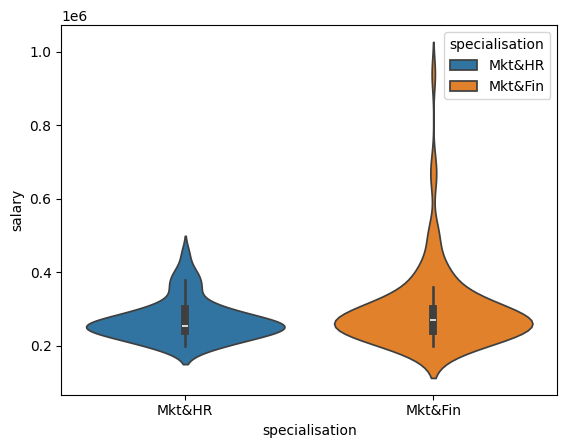

In [44]:
sb.violinplot(x = "specialisation", y = "salary", data = dataset,hue="specialisation")
plt.show()

In [ ]:
## Marketing Finance department got minimum salary

## 6.How many of them getting above 500000 salary?

In [45]:
dataset[dataset['salary'] > 500000].value_counts()

sl_no  gender  ssc_p  ssc_b    hsc_p  hsc_b    hsc_s     degree_p  degree_t   workex  etest_p  specialisation  mba_p  status  salary  
120.0  M       60.8   Central  68.40  Central  Commerce  64.6      Comm&Mgmt  Yes     82.66    Mkt&Fin         64.34  Placed  940000.0    1
151.0  M       71.0   Central  58.66  Central  Science   58.0      Sci&Tech   Yes     56.00    Mkt&Fin         61.30  Placed  690000.0    1
178.0  F       73.0   Central  97.00  Others   Commerce  79.0      Comm&Mgmt  Yes     89.00    Mkt&Fin         70.81  Placed  650000.0    1
Name: count, dtype: int64

In [46]:
dataset[dataset['salary'] > 500000].value_counts().sum()

3

In [ ]:
## 3. persons got above 500000 salary

## 7.Test the Analysis of Variance between etest_p and mba_p at signifance level 5%.(Make decision using Hypothesis Testing)

In [47]:
import pandas as pd

In [48]:
dataset=pd.read_csv("Preplacementfulldata.csv")

In [49]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [50]:
import scipy.stats as stats

stats.f_oneway(dataset['etest_p'],dataset['mba_p'])


F_onewayResult(statistic=100.49298790500407, pvalue=2.101472592739362e-21)

In [ ]:
## Null Hypothesis. H0 - There is a no significant difference between etest_p and mba_p(pvalue<0.05)
## Alternate Hypothesis. H1 - There is a significant difference between etest_p and mba_p

In [ ]:
## Answer: This pvalue is greater than 0.05 so reject null hypothesis and accept alternate hypothesis
## There is a significant difference between etest_p and mba_p

## 8.Test the similarity between the degree_t(Sci&Tech) and specialisation(Mkt&HR) with respect to salary at significance level of 5%.(Makedecision using Hypothesis Testing)

In [51]:
dataset=pd.read_csv("Preplacementfulldata.csv")
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [52]:
from scipy.stats import ttest_ind
#dataset=dataset.dropna()
degree_t = dataset[dataset['degree_t']=='Sci&Tech']['salary']
specialisation = dataset[dataset['specialisation']=='Mkt&HR']['salary']
ttest_ind(degree_t, specialisation)

TtestResult(statistic=2.692041243555374, pvalue=0.007897969943471179, df=152.0)

In [ ]:
## pvalue<0.05
## This pvalue is less than 0.05 this is true so reject null Hypothesis and accept alternate Hypothesis
## Answer: There is a significant difference between degree_t and specialisation

## 9.Convert the normal distribution to standard normal distribution for salary column

In [54]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [55]:
def stdNBgraph(dataset):
        # Coverted to standard Normal Distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()

    values=[i for i in dataset]

    z_score=[((j-mean)/std) for j in values]

    sns.distplot(z_score,kde=True)

    sum(z_score)/len(z_score)
    #z_score.std()


C:\Users\user\AppData\Local\Temp\ipykernel_20348\2909774602.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


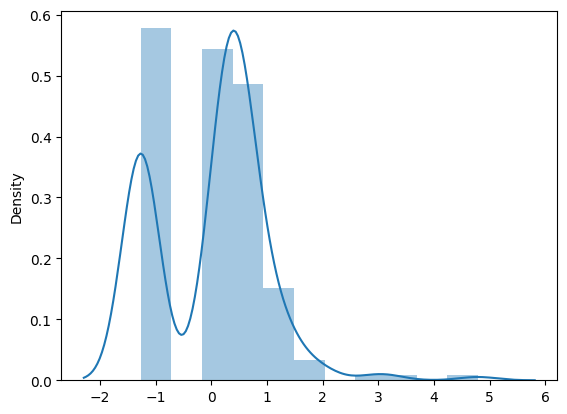

In [56]:
stdNBgraph(dataset["salary"])

## 10.What is the probability Density Function of the salary range from 700000 to 900000?¶

In [57]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [58]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    # generate a sample
    sample = dataset
    # calculate parameters
    sample_mean =sample.mean()
    sample_std = sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f' % (sample_mean, sample_std))
    # define the distribution
    dist = norm(sample_mean, sample_std)
    
    # sample probabilities for a range of outcomes
    values = [value for value in range(startrange, endrange)]
    probabilities = [dist.pdf(value) for value in values]    
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob
    

C:\Users\user\AppData\Local\Temp\ipykernel_20348\2842244316.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=196870.968, Standard Deviation=155233.760
The area between range(700000,900000):0.0005923853374033742


0.0005923853374033742

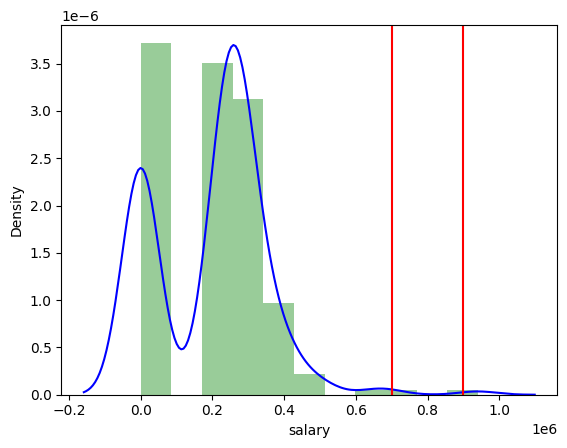

In [59]:
get_pdf_probability(dataset["salary"],700000,900000)

## 11.Test the similarity between the degree_t(Sci&Tech)with respect to etest_p and mba_p at significance level of 5%.(Make decision using Hypothesis Testing)¶

In [60]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [61]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

sci_tech_data = dataset[dataset['degree_t'] == 'Sci&Tech']

# Perform two-way ANOVA for etest_p
model = ols('etest_p ~ mba_p', data=sci_tech_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print("ANOVA table for etest_p:")
print(anova_table)

# Perform two-way ANOVA for mba_p
model = ols('mba_p ~ etest_p', data=sci_tech_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table for mba_p
print("\nANOVA table for mba_p:")
print(anova_table)


ANOVA table for etest_p:
                sum_sq    df         F    PR(>F)
mba_p       679.774801   1.0  3.748251  0.057827
Residual  10337.399284  57.0       NaN       NaN

ANOVA table for mba_p:
               sum_sq    df         F    PR(>F)
etest_p    125.260656   1.0  3.748251  0.057827
Residual  1904.850561  57.0       NaN       NaN


In [ ]:
## Null Hypothesis. H0 - There is a no significant difference between etest_p and mba_p(pvalue<0.05)
## Alternate Hypothesis. H1 - There is a significant difference between etest_p and mba_p
## This pvalue is greater than 0.05 so reject null hypothesis and accept alternate hypothesis
## There is a significant difference between etest_p and mba_p

## 12.Which parameter is highly correlated with salary?

In [32]:
import pandas as pd
import numpy as np

In [33]:
dataset=pd.read_csv("Preplacementfulldata.csv")

In [34]:
dataset

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,1.0,67.00,91.00,58.00,55.0,58.80,270000.0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,2.0,79.33,78.33,77.48,86.5,66.28,200000.0,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,3.0,65.00,68.00,64.00,75.0,57.80,250000.0,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,4.0,56.00,52.00,52.00,66.0,59.43,0.0,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,5.0,85.80,73.60,73.30,96.8,55.50,425000.0,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,211.0,80.60,82.00,77.60,91.0,74.49,400000.0,M,Others,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
213,212.0,58.00,60.00,72.00,74.0,53.62,275000.0,M,Others,Others,Science,Sci&Tech,No,Mkt&Fin,Placed
214,213.0,67.00,67.00,73.00,59.0,69.72,295000.0,M,Others,Others,Commerce,Comm&Mgmt,Yes,Mkt&Fin,Placed
215,214.0,74.00,66.00,58.00,70.0,60.23,204000.0,F,Others,Others,Commerce,Comm&Mgmt,No,Mkt&HR,Placed


In [23]:
def quanQual(dataset):
    quan=[]
    qual=[]
    for columnName in dataset.columns:
        #print(columnName)
        if(dataset[columnName].dtype=='O'):
            #print("qual")
            qual.append(columnName)
        else:
            #print("quan")
            quan.append(columnName)
    return quan,qual

In [24]:
quan,qual=quanQual(dataset)

In [25]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [26]:
dataset[quan].corr()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.085711,-0.088281,0.063636,0.022327,0.002524
ssc_p,-0.078155,1.000000,0.511472,0.538404,0.261993,0.388478,0.534030
hsc_p,-0.085711,0.511472,1.000000,0.434206,0.245113,0.354823,0.449155
degree_p,-0.088281,0.538404,0.434206,1.000000,0.224470,0.402364,0.405290
etest_p,0.063636,0.261993,0.245113,0.224470,1.000000,0.218055,0.185577
mba_p,0.022327,0.388478,0.354823,0.402364,0.218055,1.000000,0.138768
salary,0.002524,0.534030,0.449155,0.405290,0.185577,0.138768,1.000000


In [ ]:
## ssc_p is highly correlated with salary

## 13. plot any useful graph and explain it.¶

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

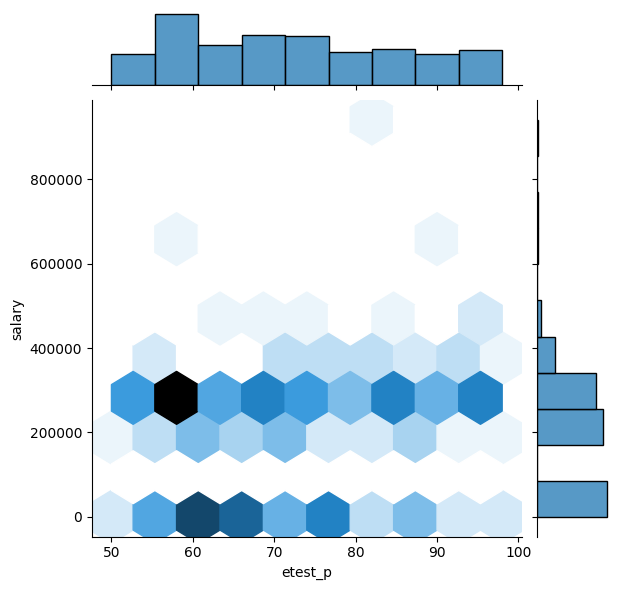

In [30]:
sb.jointplot(x = 'etest_p',y = 'salary',data = dataset,kind='hex')
plt.show()


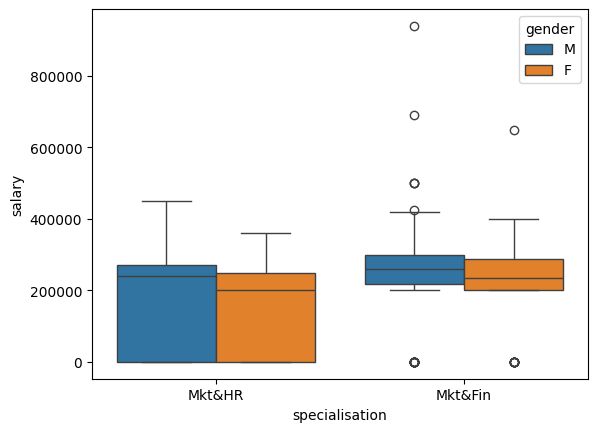

In [31]:
sb.boxplot(x = "specialisation", y = "salary", data = dataset,hue="gender" )
plt.show()